# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [134]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from scipy import stats

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../starter_code/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [113]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



610

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [106]:
#url = url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "imperial"
#query_url = f"{url}appid={weather_api_key}&units={units}q="


#list 
record = 0
city_nm = []
cloudiness = []
country = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


for city in cities:
    record += 1
    url = url = "http://api.openweathermap.org/data/2.5/weather?"
    units = "imperial"
    query_url = url + 'appid='+ weather_api_key + '&units=imperial' + "&q=" + city
    response = requests.get(query_url)
    city_json = response.json()
    if (str(response) =='<Response [200]>'):
        print(f"Processing Record{record}: {city}")
        city_nm.append(city_json["name"])
        cloudiness.append(city_json["clouds"]["all"])
        country.append(city_json["sys"]["country"])
        humidity.append(city_json["main"]["humidity"])
        lat.append(city_json["coord"]["lat"])
        lng.append(city_json["coord"]["lon"])
        max_temp.append(city_json["main"]["temp_max"])
        wind_speed.append(city_json["wind"]["speed"]) 
    else:
              print("City is not found. Skip")
              

Processing Record1: los llanos de aridane
Processing Record2: shelburne
Processing Record3: jamestown
Processing Record4: ribeira grande
Processing Record5: brae
Processing Record6: lovozero
Processing Record7: valdivia
Processing Record8: rikitea
Processing Record9: arraial do cabo
Processing Record10: geraldton
Processing Record11: kiunga
Processing Record12: mar del plata
Processing Record13: longyearbyen
Processing Record14: ushuaia
Processing Record15: poyarkovo
Processing Record16: porto novo
Processing Record17: mahebourg
Processing Record18: qaanaaq
Processing Record19: beringovskiy
Processing Record20: aklavik
Processing Record21: dikson
Processing Record22: puerto ayora
Processing Record23: vaini
Processing Record24: hobart
City is not found. Skip
Processing Record26: provideniya
Processing Record27: hilo
Processing Record28: vao
Processing Record29: albany
Processing Record30: tuktoyaktuk
Processing Record31: oranjemund
Processing Record32: butaritari
Processing Record33: kh

Processing Record272: koilas
Processing Record273: caravelas
Processing Record274: elizabeth city
Processing Record275: kemijarvi
Processing Record276: sao filipe
Processing Record277: chumikan
Processing Record278: romilly-sur-seine
Processing Record279: chiredzi
Processing Record280: ixtapa
Processing Record281: arlit
Processing Record282: makokou
Processing Record283: nizhniy tsasuchey
Processing Record284: sonqor
Processing Record285: fare
City is not found. Skip
Processing Record287: rongcheng
Processing Record288: morant bay
Processing Record289: mouila
Processing Record290: coihaique
Processing Record291: san cristobal
Processing Record292: san lawrenz
Processing Record293: bahia honda
Processing Record294: jyvaskyla
Processing Record295: shimanovsk
Processing Record296: salisbury
Processing Record297: auki
City is not found. Skip
Processing Record299: cherskiy
Processing Record300: pokrovsk
Processing Record301: hasaki
City is not found. Skip
Processing Record303: shingu
Proces

Processing Record541: esfahan
Processing Record542: catania
Processing Record543: balikpapan
Processing Record544: arganil
Processing Record545: gazanjyk
Processing Record546: nerchinskiy zavod
Processing Record547: balta
Processing Record548: obuasi
Processing Record549: quatre cocos
Processing Record550: flin flon
Processing Record551: keningau
Processing Record552: gelgaudiskis
Processing Record553: boueni
Processing Record554: chanute
Processing Record555: hanko
Processing Record556: pervomayskiy
Processing Record557: toledo
Processing Record558: costa rica
Processing Record559: zilair
Processing Record560: mercedes
Processing Record561: morwa
City is not found. Skip
Processing Record563: deniliquin
Processing Record564: sept-iles
Processing Record565: bima
Processing Record566: vanimo
Processing Record567: nong khai
Processing Record568: garden city
Processing Record569: mayumba
Processing Record570: dolores
Processing Record571: bambanglipuro
Processing Record572: la ronge
Proces

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [126]:
weather_dict = {'City':city_nm,
               'Cloudiness':cloudiness,
               'Country':country,
               'Humidity':humidity,
               'Lat':lat,
               'Lng':lng,
               'Max Temp': max_temp,
               'Wind Speed':wind_speed}
weatherDf = pd.DataFrame(weather_dict)


In [127]:
city_export = weather_df.to_csv (output_data_file, index = None, header=True)
weatherDf.count()

City          562
Cloudiness    562
Country       562
Humidity      562
Lat           562
Lng           562
Max Temp      562
Wind Speed    562
dtype: int64

In [128]:
weatherDf.head()

,City,Cloudiness,Country,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Los Llanos de Aridane,90,ES,77,28.66,-17.92,64.40,10.29
1,Shelburne,88,CA,94,44.08,-80.20,27.00,16.02
2,Jamestown,90,US,68,42.10,-79.24,28.99,16.11
3,Ribeira Grande,100,PT,79,38.52,-28.70,63.00,33.49
4,Brae,100,GB,81,60.40,-1.35,48.20,11.41


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

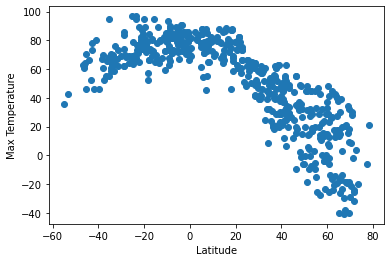

In [129]:
x_values = weatherDf['Lat']
y_values = weatherDf['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.show()

## Latitude vs. Humidity Plot

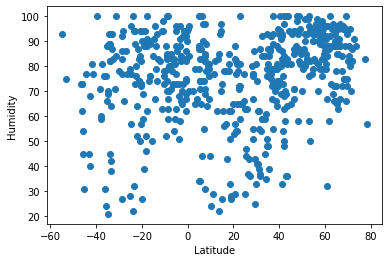

In [130]:
x_values = weatherDf['Lat']
y_values = weatherDf['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

## Latitude vs. Cloudiness Plot

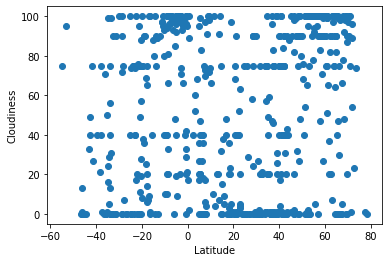

In [131]:
x_values = weatherDf['Lat']
y_values = weatherDf['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

## Latitude vs. Wind Speed Plot

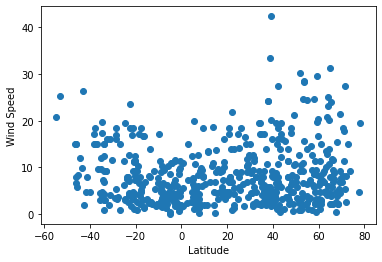

In [132]:
x_values = weatherDf['Lat']
y_values = weatherDf['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

## Linear Regression

In [135]:
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
print(regress_values)

0      8.328336
1      8.516996
2      8.492771
3      8.448971
4      8.716667
         ...   
557    8.685346
558    7.966921
559    7.577366
560    7.733237
561    8.250278
Name: Lat, Length: 562, dtype: float64


In [136]:
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

y = 0.01x +7.98


In [143]:
northern_hem = weatherDf[weatherDf['Lat'] >= 0]
southern_hem = weatherDf[weatherDf['Lat'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

y = -1.31x +89.8
The r-value is: 0.7173470795716093


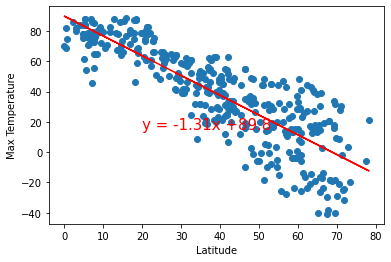

In [144]:
x_values = northern_hem['Lat']
y_values = northern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

y = 0.45x +82.55
The r-value is: 0.3130424435733427


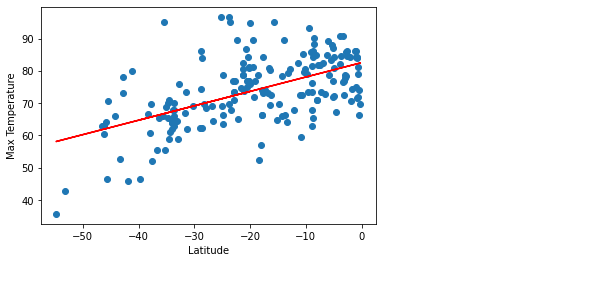

In [145]:
x_values = southern_hem['Lat']
y_values = southern_hem['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.3x +64.29
The r-value is: 0.11347070237012247


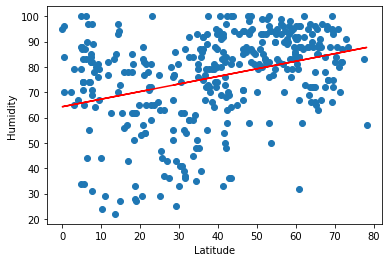

In [146]:
x_values = northern_hem['Lat']
y_values = northern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

y = 0.3x +80.96
The r-value is: 0.05251795964555511


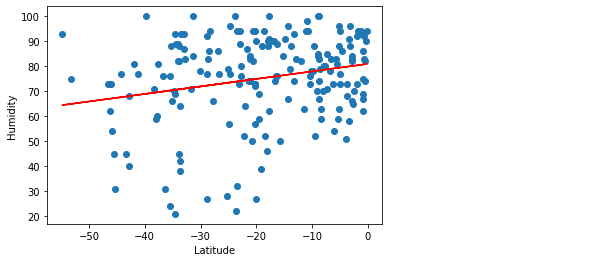

In [147]:
x_values = southern_hem['Lat']
y_values = southern_hem['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.63x +24.74
The r-value is: 0.10123135264889453


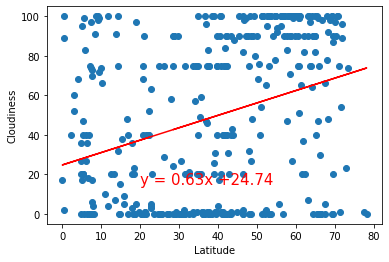

In [148]:
x_values = northern_hem['Lat']
y_values = northern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 1.2x +76.65
The r-value is: 0.1704991544950674


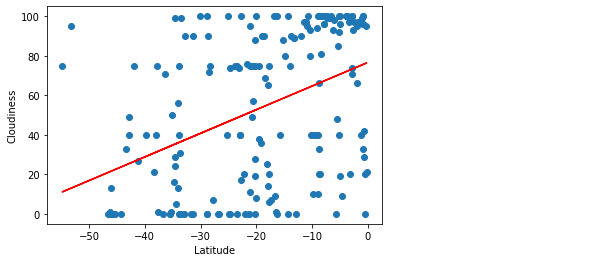

In [149]:
x_values = southern_hem['Lat']
y_values = southern_hem['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = 0.05x +6.65
The r-value is: 0.020941493978942956


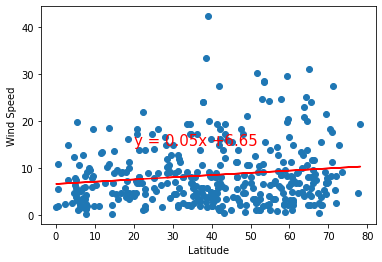

In [150]:
x_values = northern_hem['Lat']
y_values = northern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

y = -0.18x +4.26
The r-value is: 0.18107475804347126


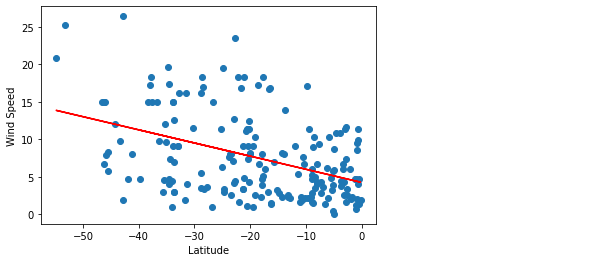

In [151]:
x_values = southern_hem['Lat']
y_values = southern_hem['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(intercept,2))
print(line_eq)

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")

# Label plot and annotate the line equation
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.annotate(line_eq,(20,15),fontsize=15,color="red")


print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()